Inserisci il ticker del titolo:  NF=F
Inserisci la data di inizio (YYYY-MM-DD):  2010-01-01
Inserisci la data di fine (YYYY-MM-DD):  2024-01-01


[*********************100%%**********************]  1 of 1 completed


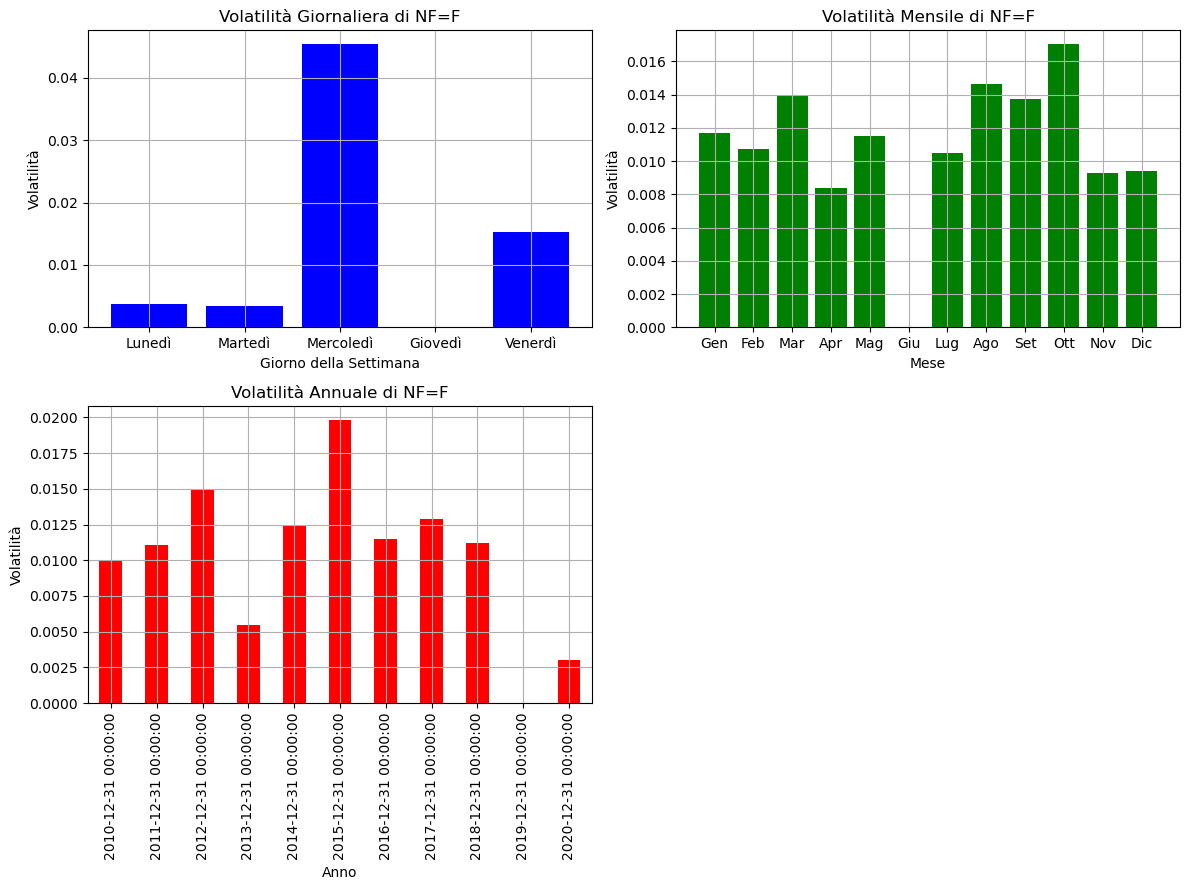

[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NF=F']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2010-01-01 -> 2024-01-01)')


KeyError: 0

In [3]:
# Copyright (c) 2024 RiccLalo97
# Tutti i diritti riservati.

#21-01-2024 rev.01


#Importiamo le librerie necessarie per l'analisi 
#yfinance per recuperare i dati da analizzare
#pandas per gestire i dati 
#matplolib per la raffigurazione dei dati 
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def calcola_volatilita_giornaliera(ticker, start_date, end_date):
    # Ottieni i dati storici del prezzo
    data = yf.download(ticker, start=start_date, end=end_date)

    # Filtra i dati mancanti
    data = data.dropna(subset=['Close'])

    if data.empty:
        print(f"Nessun dato disponibile per il ticker {ticker} nel periodo specificato.")
        return None

    # Calcola i rendimenti giornalieri
    data['Rendimento'] = data['Close'].pct_change()

    # Aggiungi una colonna per il giorno della settimana
    data['Giorno'] = data.index.dayofweek

    # Aggiungi una colonna per il mese
    data['Mese'] = data.index.month

    # Calcola la volatilità giornaliera per ogni giorno della settimana
    volatilita_giornaliera = data.groupby('Giorno')['Rendimento'].std()

    # Calcola la volatilità mensile
    volatilita_mensile = data.groupby('Mese')['Rendimento'].std()

    # Calcola la volatilità annuale
    volatilita_annuale = data.resample('Y')['Rendimento'].std()

    return volatilita_giornaliera, volatilita_annuale, volatilita_mensile

#Definizione dei giorni e mesi 
def grafico_volatilita(volatilita_giornaliera, volatilita_annuale, volatilita_mensile, ticker):
    giorni_settimana = ['Lunedì', 'Martedì', 'Mercoledì', 'Giovedì', 'Venerdì']
    mesi = ['Gen', 'Feb', 'Mar', 'Apr', 'Mag', 'Giu', 'Lug', 'Ago', 'Set', 'Ott', 'Nov', 'Dic']

    # Grafico della volatilità giornaliera
    plt.figure(figsize=(12, 9))
    plt.subplot(2, 2, 1)
    plt.bar(giorni_settimana, volatilita_giornaliera, color='b')
    plt.title(f'Volatilità Giornaliera di {ticker}')
    plt.xlabel('Giorno della Settimana')
    plt.ylabel('Volatilità')
    plt.grid(True)

    # Grafico della volatilità mensile
    plt.subplot(2, 2, 2)
    plt.bar(mesi, volatilita_mensile, color='g')
    plt.title(f'Volatilità Mensile di {ticker}')
    plt.xlabel('Mese')
    plt.ylabel('Volatilità')
    plt.grid(True)

    # Grafico della volatilità annuale
    plt.subplot(2, 2, 3)
    volatilita_annuale.plot(kind='bar', color='r')
    plt.title(f'Volatilità Annuale di {ticker}')
    plt.xlabel('Anno')
    plt.ylabel('Volatilità')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    
    
def main():
    # Input dell'utente
    ticker = input("Inserisci il ticker del titolo [Vedi Yahoofinance]: ")
    start_date = input("Inserisci la data di inizio (YYYY-MM-DD): ")
    end_date = input("Inserisci la data di fine (YYYY-MM-DD): ")

    # Calcola la volatilità giornaliera, mensile e annuale
    volatilita_giornaliera, volatilita_annuale, volatilita_mensile = calcola_volatilita_giornaliera(ticker, start_date, end_date)

    # Grafico della volatilità
    grafico_volatilita(volatilita_giornaliera, volatilita_annuale, volatilita_mensile, ticker)

    # Calcola statistiche dei rendimenti giornalieri
    data = yf.download(ticker, start=start_date, end=end_date)
    rendimenti_giornalieri = data['Close'].pct_change().dropna()

    media = rendimenti_giornalieri.mean()
    mediana = rendimenti_giornalieri.median()
    moda = rendimenti_giornalieri.mode()[0]  # Moda restituisce una Serie, prendiamo solo il primo valore
    quartile = rendimenti_giornalieri.quantile([0.25, 0.5, 0.75])
    deviazione_standard = rendimenti_giornalieri.std()

    # Crea la tabella
    tabella_statistiche = pd.DataFrame({
        'Statistica': ['Media', 'Mediana', 'Moda', 'Primo Quartile', 'Secondo Quartile', 'Terzo Quartile', 'Dev. Standard'],
        'Valore': [media, mediana, moda, quartile[0.25], quartile[0.5], quartile[0.75], deviazione_standard]
    })

    print("\nTabella delle Statistiche dei Rendimenti Giornalieri:")
    print(tabella_statistiche)

if __name__ == "__main__":
    main()



Inserisci il ticker del titolo:  NG=F
Inserisci la data di inizio (YYYY-MM-DD):  2005-01-01
Inserisci la data di fine (YYYY-MM-DD):  2010-01-01


[*********************100%%**********************]  1 of 1 completed


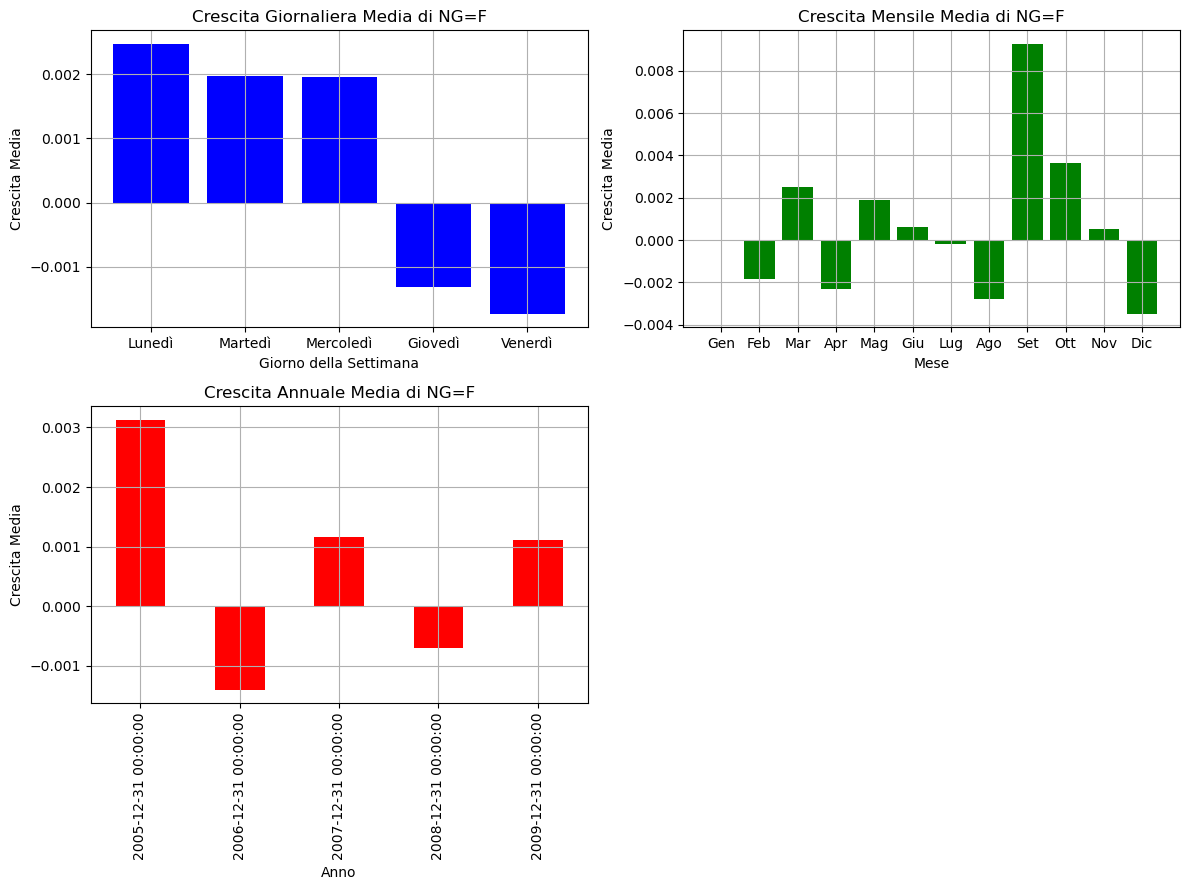

[*********************100%%**********************]  1 of 1 completed

Tabella delle Statistiche della Crescita Giornaliera dei Prezzi:
         Statistica    Valore
0             Media  0.000661
1           Mediana -0.001132
2              Moda  0.000000
3    Primo Quartile -0.020784
4  Secondo Quartile -0.001132
5    Terzo Quartile  0.019179
6     Dev. Standard  0.037681


In [7]:
# Analisi Crescita Prezzi Giornaliera - Mensile - Annuale 
# script copyright [RiccLalo97]
# 21/01/2024

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def calcola_crescita_giornaliera(ticker, start_date, end_date):
    # Ottieni i dati storici del prezzo
    data = yf.download(ticker, start=start_date, end=end_date)

    # Filtra i dati mancanti
    data = data.dropna(subset=['Close'])

    if data.empty:
        print(f"Nessun dato disponibile per il ticker {ticker} nel periodo specificato.")
        return None

    # Calcola la crescita giornaliera
    data['Crescita'] = data['Close'].pct_change()

    # Aggiungi una colonna per il giorno della settimana
    data['Giorno'] = data.index.dayofweek

    # Aggiungi una colonna per il mese
    data['Mese'] = data.index.month

    # Calcola la crescita giornaliera media per ogni giorno della settimana
    crescita_giornaliera_media = data.groupby('Giorno')['Crescita'].mean()

    # Calcola la crescita mensile media
    crescita_mensile_media = data.groupby('Mese')['Crescita'].mean()

    # Calcola la crescita annuale media
    crescita_annuale_media = data.resample('Y')['Crescita'].mean()

    return crescita_giornaliera_media, crescita_annuale_media, crescita_mensile_media

def grafico_crescita(crescita_giornaliera_media, crescita_annuale_media, crescita_mensile_media, ticker):
    giorni_settimana = ['Lunedì', 'Martedì', 'Mercoledì', 'Giovedì', 'Venerdì']
    mesi = ['Gen', 'Feb', 'Mar', 'Apr', 'Mag', 'Giu', 'Lug', 'Ago', 'Set', 'Ott', 'Nov', 'Dic']

    # Grafico della crescita giornaliera media
    plt.figure(figsize=(12, 9))
    plt.subplot(2, 2, 1)
    plt.bar(giorni_settimana, crescita_giornaliera_media, color='b')
    plt.title(f'Crescita Giornaliera Media di {ticker}')
    plt.xlabel('Giorno della Settimana')
    plt.ylabel('Crescita Media')
    plt.grid(True)

    # Grafico della crescita mensile media
    plt.subplot(2, 2, 2)
    plt.bar(mesi, crescita_mensile_media, color='g')
    plt.title(f'Crescita Mensile Media di {ticker}')
    plt.xlabel('Mese')
    plt.ylabel('Crescita Media')
    plt.grid(True)

    # Grafico della crescita annuale media
    plt.subplot(2, 2, 3)
    crescita_annuale_media.plot(kind='bar', color='r')
    plt.title(f'Crescita Annuale Media di {ticker}')
    plt.xlabel('Anno')
    plt.ylabel('Crescita Media')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def main():
    # Input dell'utente
    ticker = input("Inserisci il ticker del titolo: ")
    start_date = input("Inserisci la data di inizio (YYYY-MM-DD): ")
    end_date = input("Inserisci la data di fine (YYYY-MM-DD): ")

    # Calcola la crescita giornaliera, mensile e annuale
    crescita_giornaliera_media, crescita_annuale_media, crescita_mensile_media = calcola_crescita_giornaliera(ticker, start_date, end_date)

    # Grafico della crescita
    grafico_crescita(crescita_giornaliera_media, crescita_annuale_media, crescita_mensile_media, ticker)

    # Calcola statistiche dei rendimenti giornalieri
    data = yf.download(ticker, start=start_date, end=end_date)
    crescita_giornaliera = data['Close'].pct_change().dropna()

    media = crescita_giornaliera.mean()
    mediana = crescita_giornaliera.median()
    moda = crescita_giornaliera.mode()[0]  # Moda restituisce una Serie, prendiamo solo il primo valore
    quartile = crescita_giornaliera.quantile([0.25, 0.5, 0.75])
    deviazione_standard = crescita_giornaliera.std()

    # Crea la tabella
    tabella_statistiche = pd.DataFrame({
        'Statistica': ['Media', 'Mediana', 'Moda', 'Primo Quartile', 'Secondo Quartile', 'Terzo Quartile', 'Dev. Standard'],
        'Valore': [media, mediana, moda, quartile[0.25], quartile[0.5], quartile[0.75], deviazione_standard]
    })

    print("\nTabella delle Statistiche della Crescita Giornaliera dei Prezzi:")
    print(tabella_statistiche)

if __name__ == "__main__":
    main()



Inserisci il ticker del primo asset:  ^GSPC
Inserisci il ticker del secondo asset:  ^IXIC
Inserisci la data di inizio analisi (YYYY-MM-DD):  2000-01-01
Inserisci la data di fine analisi (YYYY-MM-DD):  2024-01-01


[*********************100%%**********************]  2 of 2 completed


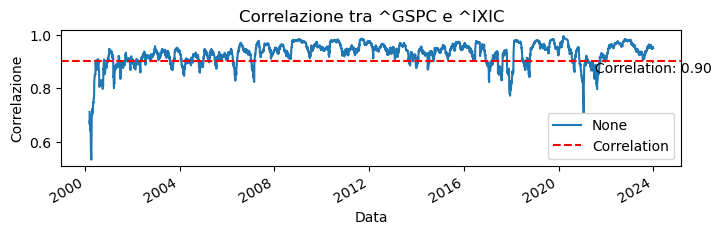

In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Funzione per ottenere i dati di ritorno degli asset da Yahoo Finance
def get_returns(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    returns = data.pct_change().dropna()
    return returns

# Chiedi all'utente di inserire i ticker degli asset
ticker1 = input('Inserisci il ticker del primo asset: ')
ticker2 = input('Inserisci il ticker del secondo asset: ')

# Chiedi all'utente di inserire le date di inizio e fine analisi
start_date = input('Inserisci la data di inizio analisi (YYYY-MM-DD): ')
end_date = input('Inserisci la data di fine analisi (YYYY-MM-DD): ')

# Ottieni i dati di ritorno degli asset da Yahoo Finance
returns = get_returns([ticker1, ticker2], start_date, end_date)

# Calcola la correlazione tra i due asset
correlation = returns[ticker1].corr(returns[ticker2])

# Plot della correlazione con una linea rossa
ax = returns[ticker1].rolling(window=50).corr(returns[ticker2]).plot(figsize=(8, 2))
ax.axhline(correlation, c='r', linestyle='--', label='Correlation')

# Aggiungi un testo con il valore di correlazione nel grafico
ax.text(returns.index[-1], correlation, f'Correlation: {correlation:.2f}', ha='center', va='top')

# Impostazione delle etichette e del titolo del grafico
plt.title(f'Correlazione tra {ticker1} e {ticker2}')
plt.xlabel('Data')
plt.ylabel('Correlazione')
plt.legend()
plt.show()

